### 1. How to import pandas and check the version?

In [90]:
# Solution 1
import pandas as pd
print(f"1. Сurrent version: {pd.__version__}")

# Solution 2
# print("\n2. Сurrent version:")
# pd.show_versions(as_json=False)

# Solution 3
# print("\n3. Сurrent version:")
# !pip show pandas


1. Сurrent version: 2.2.2


---
- [pandas.show_versions()](https://pandas.pydata.org/docs/reference/api/pandas.show_versions.html) - provide useful information, important for bug reports.
---

### 2. How to create a series from a list, numpy array and dict?

Create a pandas series from each of the items below: a list, numpy and a dictionary

In [91]:
import numpy as np
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

list2ser = pd.Series(mylist)
print(f"Series from the list:\n{list2ser.head(3)}")

arr2ser = pd.Series(myarr)
print(f"Series from the ndarray: {arr2ser.head(3)}")

dict2ser = pd.Series(mydict)
print(f"Series from the list: {dict2ser.head(3)}")

Series from the list:
0    a
1    b
2    c
dtype: object
Series from the ndarray: 0    0
1    1
2    2
dtype: int64
Series from the list: a    0
b    1
c    2
dtype: int64


---
- [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) - return evenly spaced values within a given interval.
- [pandas.Series()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) - one-dimensional ndarray with axis labels (including time series).
- [pandas.Series.head()](https://pandas.pydata.org/docs/reference/api/pandas.Series.head.html) - return the first n rows.
---

### 3. How to convert the index of a series into a column of a dataframe?

Difficulty Level: L1

Convert the series ser into a dataframe with its index as another column on the dataframe.

In [92]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

df = ser.to_frame().reset_index()
df.head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
- [pandas.Series.to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html) - convert Series to DataFrame.
- [pandas.DataFrame.reser_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) - reset the index, or a level of it.
- [pandas.DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) - return the first n rows.
---


### 4. How to combine many series to form a dataframe?

Difficulty Level: L1

Combine ser1 and ser2 to form a dataframe.

In [93]:
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

df = pd.concat([ser1, ser2], axis=1)
df.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


---
- [pandas.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) - concatenate pandas objects along a particular axis.
---

### 5. How to assign name to the series’ index?

Difficulty Level: L1

Give a name to the series ser calling it ‘alphabets’.

In [94]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

ser.name = "alphabets"
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

---
- [pandas.Series.name](https://pandas.pydata.org/docs/reference/api/pandas.Series.name.html) - return the name of the Series.
---

### 6. How to get the items of series A not present in series B?

Difficulty Level: L2

From ser1 remove items present in ser2.

In [95]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("Elements not contained in ser2:")
ser1[~ser1.isin(ser2)]

Elements not contained in ser2:


0    1
1    2
2    3
dtype: int64

---
- [pandas.Series.isin()](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) - whether elements in Series are contained in values.
- [pandas indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html)
---

### 7. How to get the items not common to both series A and series B?

Difficulty Level: L2

Get all items of ser1 and ser2 not common to both.

In [96]:
import numpy as np
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

# Solution 1
print("Symmetric difference with pandas:")
print(pd.concat([ser1[~ser1.isin(ser2)], ser2[~ser2.isin(ser1)]]))

# Solution 2
print("Symmetric difference with numpy:")
print(np.setxor1d(ser1, ser2))

Symmetric difference with pandas:
0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64
Symmetric difference with numpy:
[1 2 3 6 7 8]


---
- [numpy.setxor1d()](https://numpy.org/doc/stable/reference/generated/numpy.setxor1d.html) - find the set exclusive-or of two arrays.
---

### 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

Difficuty Level: L2

Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

Minimum: 3.7614461807730324
25th percentile: 9.735840570355938
Median: 11.570844906311612
25th percentile: 14.537298129684414
Maximum: 16.586716813936135


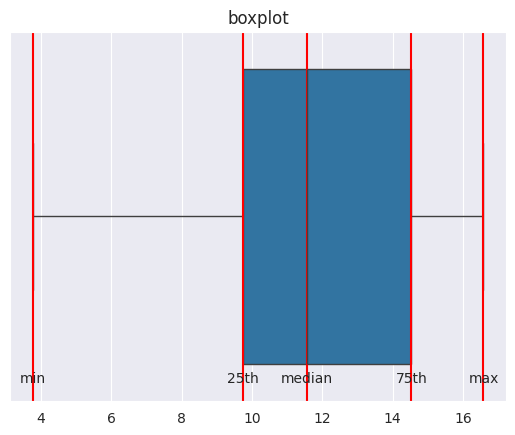

In [97]:
ser = pd.Series(np.random.normal(10, 5, 25))

print(f"Minimum: {ser.min()}")
print(f"25th percentile: {ser.quantile(0.25)}")
print(f"Median: {ser.median()}")
print(f"25th percentile: {ser.quantile(0.75)}")
print(f"Maximum: {ser.max()}")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.boxplot(ser, orient="h")

lines = {
    "min": ser.min(),
    "25th": ser.quantile(0.25),
    "median": ser.median(),
    "75th": ser.quantile(0.75),
    "max": ser.max()
}

for label, value in lines.items():
    plt.axvline(value, color="red")
    plt.text(value, 0.45, label, ha='center')

plt.title("boxplot")
plt.show()

---
- [pandas.Series.min()](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html) - return the minimum of the values over the requested axis.
- [pandas.Series.max()](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html#pandas.Series.max) - return the maximum of the values over the requested axis.
- [pandas.Series.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html#pandas.Series.quantile) - return value at the given quantile.
---

### 9. How to get frequency counts of unique items of a series?

Difficulty Level: L1

Calculte the frequency counts of each unique value ser.

In [98]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

print("Frequency counts:")
ser.value_counts()

Frequency counts:


a    8
b    7
g    7
c    3
e    3
h    2
Name: count, dtype: int64

---
- [pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) - return a Series containing counts of unique values.
---

### 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

Difficulty Level: L2

From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.

In [99]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

print(f"Top 2 frequency:")
print(count := ser.value_counts(sort=True, ascending=False)[:2])

ser  = ser.apply(lambda x: x if x in count else "Other")
ser.head()

Top 2 frequency:
2    7
3    2
Name: count, dtype: int64


0    2
1    2
2    2
3    2
4    2
dtype: object

---
- [pandas.Series.apply()](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html#pandas.Series.apply) - invoke function on values of Series. 
---

### 11. How to bin a numeric series to 10 groups of equal size?

Difficulty Level: L2

Bin the series ser into 10 equal deciles and replace the values with the bin name.


In [100]:
ser = pd.Series(np.random.random(20))

pd.cut(ser, bins=10, labels=[f"{i}th" for i in range(1, 11)]).head()

0    4th
1    8th
2    3th
3    2th
4    1th
dtype: category
Categories (10, object): ['1th' < '2th' < '3th' < '4th' ... '7th' < '8th' < '9th' < '10th']

---
- [pandas.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html#pandas.cut) - bin values into discrete intervals.
---

### 12. How to convert a numpy array to a dataframe of given shape? (L1)

Difficulty Level: L1

Reshape the series ser into a dataframe with 7 rows and 5 columns

In [101]:
ser = pd.Series(np.random.randint(1, 10, 35))

df = pd.DataFrame(ser.to_numpy().reshape((5, 7)))

df.head()

,0,1,2,3,4,5,6
0,7,4,3,1,6,8,2
1,3,2,3,4,3,9,1
2,7,7,2,8,6,9,6
3,4,4,7,6,6,3,1
4,6,2,8,5,7,4,4


---
- [pandas.Series.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) - a NumPy ndarray representing the values in this Series or Index.
- [numpy.ndarray.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) - gives a new shape to an array without changing its data.
- [pandas.DataFrame()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) - two-dimensional, size-mutable, potentially heterogeneous tabular data.
---


### 13. How to find the positions of numbers that are multiples of 3 from a series?

Difficulty Level: L2

Find the positions of numbers that are multiples of 3 from ser.

In [102]:
ser = pd.Series(np.random.randint(1, 10, 7))

print(f"Positions of numbers that are multiples of 3: {ser[ser % 3 == 0].index}")

Positions of numbers that are multiples of 3: Index([2, 4, 6], dtype='int64')


---
- [pandas.Series.index](https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html) - the index (axis labels) of the Series.
---

### 14. How to extract items at given positions from a series

Difficulty Level: L1

From ser, extract the items at positions in list pos.

In [103]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

print(f"Elements in positions: {pos}")
ser[pos]

Elements in positions: [0, 4, 8, 14, 20]


0     a
4     e
8     i
14    o
20    u
dtype: object

### 15. How to stack two series vertically and horizontally ?

Difficulty Level: L1

Stack ser1 and ser2 vertically and horizontally (to form a dataframe).

In [104]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

# Vertically
pd.concat([ser1, ser2], axis=1)

# Horizontaly
# pd.concat([ser1, ser2], axis=0)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


### 16. How to get the positions of items of series A in another series B?

Difficulty Level: L2

Get the positions of items of ser2 in ser1 as a list.

In [105]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

print(f"Index: {ser1[ser1.isin(ser2)].index.to_list()}")

Index: [0, 4, 5, 8]


---
- [pandas.Index.to_list()](https://pandas.pydata.org/docs/reference/api/pandas.Index.to_list.html) - return a list of the values.
---

### 17. How to compute the mean squared error on a truth and predicted series?

Difficulty Level: L2

Compute the mean squared error of truth and pred series.

In [106]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)


print(f"Mean squared error of truth and pred: {((truth-pred)**2).mean()}")

Mean squared error of truth and pred: 0.2846466782540367


---
- [pandas.Series.mean()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html) - return the mean of the values over the requested axis.
---

### 18. How to convert the first character of each element in a series to uppercase?

Difficulty Level: L2

Change the first character of each word to upper case in each word of ser.

In [107]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

print("Title:")

ser.str.title()

Title:


0     How
1      To
2    Kick
3    Ass?
dtype: object

---
- [pandas.Series.str](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html) - vectorized string functions for Series and Index.
---


### 19. How to calculate the number of characters in each word in a series?

Difficulty Level: L2

In [108]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
print("Length:")
ser.str.len()

Length:


0    3
1    2
2    4
3    4
dtype: int64

### 20. How to compute difference of differences between consequtive numbers of a series?

Difficulty Level: L1

Difference of differences between the consequtive numbers of ser.

In [109]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

print(ser.diff().to_list())
print(ser.diff().diff().to_list())


[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


---
- [pandas.Series.diff()](https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html#pandas.Series.diff) - first discrete difference of element.
---

### 21. How to convert a series of date-strings to a timeseries?

Difficiulty Level: L2

In [110]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser = ser.astype("datetime64[ns]")
ser

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

---
- [pandas.Series.astype()](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html#pandas.Series.astype) - cast a pandas object to a specified dtype dtype.
---

### 22. How to get the day of month, week number, day of year and day of week from a series of date strings?

Difficiulty Level: L2

Get the day of month, week number, day of year and day of week from ser.

In [111]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

ser = ser.astype("datetime64[ns]")
print(f"Day:\n{ser.dt.day.to_list()}")
print(f"Week:\n{ser.dt.isocalendar().week.to_list()}")
print(f"Day of year:\n{ser.dt.day_of_year.to_list()}")
print(f"Day of week:\n{ser.dt.day_name().to_list()}")

Day:
[1, 2, 3, 4, 5, 6]
Week:
[53, 5, 9, 14, 19, 23]
Day of year:
[1, 33, 63, 94, 125, 157]
Day of week:
['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


---
- [pandas.Series.dt](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) - accessor object for datetimelike properties of the Series values.
- [pandas.Series.dt.day](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html#pandas-series-dt-day) - the day of the datetime.
- [pandas.Series.dt.isocalendar()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.isocalendar.html#pandas.Series.dt.isocalendar) - calculate year, week, and day according to the ISO 8601 standard.
- [pandas.Series.dt.day_of_year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_year.html#pandas.Series.dt.day_of_year) - the ordinal day of the year.
- [pandas.Series.dt.day_name()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name) - return the day names with specified locale.
---


### 23. How to convert year-month string to dates corresponding to the 4th day of the month?

Difficiulty Level: L2

Change ser to dates that start with 4th of the respective months.

In [112]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
ser = pd.to_datetime(ser + " 4", format="%b %Y %d")
ser

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

---
- [pandas.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas-to-datetime) - convert argument to datetime.
---

### 24. How to filter words that contain atleast 2 vowels from a series?

Difficiulty Level: L3

From ser, extract words that contain atleast 2 vowels.

In [113]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

import re
print("Words that contain atleast 2 vowels:")
ser[ser.isin([el for el in ser if len(re.findall(r"[aeiou]", el.lower())) >= 2])]


Words that contain atleast 2 vowels:


0     Apple
1    Orange
4     Money
dtype: object

---
- [re](https://docs.python.org/3/library/re.html) - this module provides regular expression matching operations similar to those found in Perl.
---

### 25. How to filter valid emails from a series?

Difficiulty Level: L3

Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.

In [114]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

print("Valid email:")
emails[emails.str.contains(pattern, regex=True)]

Valid email:


1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

---
- [pandas.Series.str.contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html#pandas.Series.str.contains) - test if pattern or regex is contained within a string of a Series or Index.
---

### 26. How to get the mean of a series grouped by another series?

Difficiulty Level: L2

Compute the mean of weights of each fruit.

In [115]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
print(f"Weights: {weights.to_list()}")
print(f"Fruit: {fruit.to_list()}")

df = pd.concat([fruit, weights], axis=1).groupby(by=0, sort=True).mean()

df


Weights: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Fruit: ['carrot', 'banana', 'carrot', 'apple', 'banana', 'banana', 'carrot', 'carrot', 'apple', 'carrot']


,1
0,
apple,6.500000
banana,4.333333
carrot,5.800000


---
- [pandas.DataFrame.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) - group DataFrame using a mapper or by a Series of columns.
- [pandas.core.groupby.DataFrameGroupBy.mean()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html#pandas.core.groupby.DataFrameGroupBy.mean) - compute mean of groups, excluding missing values.
---

### 27. How to compute the euclidean distance between two series?

Difficiulty Level: L2

Compute the euclidean distance between series (points) p and q, without using a packaged formula.

In [116]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

import scipy.spatial.distance as ssd
# Solution 1
print(f"1 SciPy: {ssd.euclidean(p, q)}")

# Solution 2
print(f"2 NumPy: {np.linalg.norm(p - q)}")

# Solution 3
print(f"3 Pandas: {sum((p - q)**2)**(1/2)}")


1 SciPy: 18.16590212458495
2 NumPy: 18.16590212458495
3 Pandas: 18.16590212458495


---
- [scipy.spatial.distance.euclidean()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html) - computes the Euclidean distance between two 1-D arrays.
- [numpy.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) - this function is able to return one of eight different matrix norms, or one of an infinite number of vector norms (described below), depending on the value of the ord parameter.
---

### 28. How to find all the local maxima (or peaks) in a numeric series?

Difficiulty Level: L3

Get the positions of peaks (values surrounded by smaller values on both sides) in ser.

In [117]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [118]:
%%timeit -r 3 -n 10000
# Solution 1
padding = np.concatenate([[0], ser.values, [0]])

condition = (padding[:-2] < padding[1:-1]) & (padding[1:-1] > padding[2:])

np.where(condition)[0]  

9.77 µs ± 2.54 µs per loop (mean ± std. dev. of 3 runs, 10,000 loops each)


In [119]:
%%timeit -r 3 -n 10000
# Solution 2
dd = np.diff(np.sign(np.diff(ser)))
np.where(dd == -2)[0] + 1


24.7 µs ± 339 ns per loop (mean ± std. dev. of 3 runs, 10,000 loops each)


---
- [numpy.concatenate()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) - join a sequence of arrays along an existing axis.
- [numpy.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where) - return elements chosen from x or y depending on condition.
- [numpy.diff()](https://numpy.org/doc/stable/reference/generated/numpy.diff.html#numpy.diff) - calculate the n-th discrete difference along the given axis.
- [numpy.sign()](https://numpy.org/doc/stable/reference/generated/numpy.sign.html#numpy.sign) - returns an element-wise indication of the sign of a number.
---

### 29. How to replace missing spaces in a string with the least frequent character?

Replace the spaces in my_str with the least frequent character.

Difficiulty Level: L2

In [120]:
my_str = 'dbc deb abed gade'
ser = pd.Series(list(my_str))

letter = sorted(ser.value_counts().to_dict().items(), key=lambda item: (item[1], item[0]))[0][0]
print(my_str.replace(" ", letter))

dbccdebcabedcgade


### 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?

Difficiulty Level: L2

In [121]:
ser = pd.Series(np.random.randint(0, 20, size=10), index=pd.date_range(start="2000-01-01", periods=10, freq="7D"))
ser

2000-01-01     9
2000-01-08    16
2000-01-15     4
2000-01-22    15
2000-01-29     2
2000-02-05    12
2000-02-12    18
2000-02-19     2
2000-02-26     5
2000-03-04     9
Freq: 7D, dtype: int64

---
- [pandas.date_range()](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range) - return a fixed frequency DatetimeIndex.
---

### 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?

Difficiulty Level: L2

ser has missing dates and values. Make all missing dates appear and fill up with value from previous date.

In [122]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

# Solution 1
# new = pd.Series(ser, pd.date_range(ser.index.min(), ser.index.max()))
# new.ffill()

# Solution 2
ser.resample("D").ffill()

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

---
- [pandas.Series.resample()](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html#pandas.Series.resample) - resample time-series data.
- [pandas.core.resample.Resampler.ffill()](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.ffill.html#pandas.core.resample.Resampler.ffill) - forward fill the values.
---

### 32. How to compute the autocorrelations of a numeric series?

Difficiulty Level: L3

Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

In [123]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

autocorrelations = [ser.autocorr(i).round(2) for i in range(11)]
print(autocorrelations[1:])
print('Lag having highest correlation: ', np.argmax(np.abs(autocorrelations[1:]))+1)

[np.float64(0.03), np.float64(0.26), np.float64(0.17), np.float64(-0.23), np.float64(0.13), np.float64(-0.06), np.float64(-0.19), np.float64(0.63), np.float64(0.09), np.float64(0.0)]
Lag having highest correlation:  8


---
- [pandas.Series.autocorr()](https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html#pandas.Series.autocorr) - compute the lag-N autocorrelation.
- [numpy.abs()](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) - calculate the absolute value element-wise.
- [numpy.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy-argmax) - returns the indices of the maximum values along an axis.
---


### 33. How to import only every nth row from a csv file to create a dataframe?

Difficiulty Level: L2

Import every 50th row of BostonHousing dataset as a dataframe.

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.concat([chunk.iloc[0] for chunk in df], axis=1)
df2 = df2.transpose()
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


---
- [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) - read a comma-separated values (csv) file into DataFrame.
  - Hint: chunksize - number of lines to read from the file per chunk.
- [pandas.DataFrame.transpose()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose) - transpose index and columns.
---

### 34. How to change column values when importing csv to a dataframe?

Difficulty Level: L2

Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', converters={"medv" : lambda x: "Low" if float(x) < 25 else "High"})

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High


---
- Hint: converters - functions for converting values in specified columns. Keys can either be column labels or column indices.
---

### 35. How to create a dataframe with rows as strides from a given series?

Difficiulty Level: L3

In [126]:
L = pd.Series(range(15))

def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

### 36. How to import only specified columns from a csv file?

Difficulty Level: L1

Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.

In [127]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', usecols=["crim", "medv"])

df.head()

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


### 37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.

Difficulty Level: L2

Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. Also get the numpy array and list equivalent of the dataframe.

In [128]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv")

print(f"Shape: {df.shape}")
print(f"Dtypes: {df.info()}")
print(f"Statistics: {df.describe()}")

# numpy array 
df_arr = df.values

# list
df_list = df.values.tolist()


Shape: (93, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             55 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 

---
- [pandas.DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape) - return a tuple representing the dimensionality of the DataFrame.
- [pandas.DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info) - print a concise summary of a DataFrame.
- [pandas.DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) - generate descriptive statistics.
---

### 38. How to extract the row and column number of a particular cell with given criterion?

Difficulty Level: L1

Which manufacturer, model and type has the highest Price? What is the row and column number of the cell with the highest Price value?

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df[df["Price"] == df["Price"].max()].loc[:, ["Manufacturer",	"Model"]]

,Manufacturer,Model
58,Mercedes-Benz,300E


---
- [pandas.DataFrame.loc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc) - access a group of rows and columns by label(s) or a boolean array.
---

### 39. How to rename a specific columns in a dataframe?

Difficulty Level: L2

Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’.

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.columns)

df.rename(columns={"Type": "CarType"}, inplace=True)
df.columns = df.columns.str.replace(".", "_")

print(df.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')
Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


---
- [pandas.DataFrame.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename) - rename columns or index labels.
---

### 40. How to check if a dataframe has any missing values?

Difficulty Level: L1

Check if df has any missing values.

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

---
- [pandas.DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) - detect missing values.
- [pandas.DataFrame.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum) - return the sum of the values over the requested axis.
---

### 41. How to count the number of missing values in each column?

Difficulty Level: L2

Count the number of missing values in each column of df. Which column has the maximum number of missing values?

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

### 42. How to replace missing values of multiple numeric columns with the mean?

Difficulty Level: L2

Replace missing values in Min.Price and Max.Price columns with their respective mean.

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df["Min.Price"] = df["Min.Price"].fillna(df["Min.Price"].mean())
df["Max.Price"] = df["Max.Price"].fillna(df["Min.Price"].mean())

---
- [pandas.DataFrame.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) - fill NA/NaN values using the specified method.
- [panda.DataFrame.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean) - return the mean of the values over the requested axis.
---

### 43. How to use apply function on existing columns with global variables as additional arguments?

Difficulty Level: L3

In df, use apply method to replace the missing values in Min.Price with the column’s mean and those in Max.Price with the column’s median.

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}
df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x, d: x.fillna(d[x.name](x)), args=(d, ))

---
- [pandas.DataFrame.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) - apply a function along an axis of the DataFrame.
---

### 44. How to select a specific column from a dataframe as a dataframe instead of a series?

Difficulty Level: L2

Get the first column (a) in df as a dataframe (rather than as a Series).


In [135]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

df[["a"]]

,a
0,0
1,5
2,10
3,15


### 45. How to change the order of columns of a dataframe?

Difficulty Level: L3

Actually 3 questions.

    In df, interchange columns 'a' and 'c'.

    Create a generic function to interchange two columns, without hardcoding column names.

    Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last.


In [136]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

def swap_columns(df, a, b):
    temp = df.columns.to_list()
    temp[df.columns.to_list().index(a)] = b 
    temp[df.columns.to_list().index(b)] = a
    return df.reindex(columns=temp)

df = swap_columns(df, "a", "c")

df.sort_index(axis=1, inplace=True)

df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


---
- [pandas.DataFrame.reindex()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html#pandas.DataFrame.reindex) - conform DataFrame to new index with optional filling logic.
- [pandas.DataFrame.sort_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index) - sort object by labels (along an axis).
---

### 46. How to set the number of rows and columns displayed in the output?

Difficulty Level: L2

Change the pamdas display settings on printing the dataframe df it shows a maximum of 10 rows and 10 columns.

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
df

,Manufacturer,Model,Type,Min.Price,Price,...,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,...,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,...,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,...,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,...,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,...,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,...,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,...,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,...,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,...,29.5,14.0,2985.0,non-USA,Volvo 240


---
- [pandas.set_option()](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html#pandas-set-option) - sets the value of the specified option.
---

### 47. How to format or suppress scientific notations in a pandas dataframe?

Difficulty Level: L2

Suppress scientific notations like ‘e-03’ in df and print upto 4 numbers after decimal.



In [138]:
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df

,random
0,0.0004
1,0.8738
2,0.0198
3,0.0043


### 48. How to format all the values in a dataframe as percentages?

Difficulty Level: L2

Format the values in column 'random' of df as percentages.

In [139]:
df = pd.DataFrame(np.random.random(4), columns=['random'])
pd.set_option('display.float_format', lambda x: f"{round(x*100, 2)}%")
df

,random
0,30.33%
1,99.11%
2,73.26%
3,13.92%


### 49. How to filter every nth row in a dataframe?

Difficulty Level: L1

From df, filter the 'Manufacturer', 'Model' and 'Type' for every 20th row starting from 1st (row 0).

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.loc[::20, ['Manufacturer', 'Model', 'Type']])

   Manufacturer    Model     Type
0         Acura  Integra    Small
20     Chrysler  LeBaron  Compact
40        Honda  Prelude   Sporty
60      Mercury   Cougar  Midsize
80       Subaru   Loyale    Small


### 50. How to create a primary key index by combining relevant columns?

Difficulty Level: L2

In df, Replace NaNs with ‘missing’ in columns 'Manufacturer', 'Model' and 'Type' and create a index as a combination of these three columns and check if the index is a primary key.

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv', usecols=[0,1,2,3,5])

df[['Manufacturer', 'Model', 'Type']] = df[['Manufacturer', 'Model', 'Type']].fillna('missing')
df.index = df.Manufacturer + '_' + df.Model + '_' + df.Type
print(f"Primary key: {df.index.is_unique}")

Primary key: True


---
- [panda.Index.is_unique](https://pandas.pydata.org/docs/reference/api/pandas.Index.is_unique.html#pandas.Index.is_unique) - return if the index has unique values.
---

### 51. How to get the row number of the nth largest value in a column?

Difficulty Level: L2

Find the row position of the 5th largest value of column 'a' in df.

In [142]:
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))
print(f"Position of the 5th largest value:\n {df.sort_values(by="a", ascending=False)[:5].index.to_list()}")

Position of the 5th largest value:
 [5, 2, 3, 4, 9]


### 52. How to find the position of the nth largest value greater than a given value?

Difficulty Level: L2

In ser, find the position of the 2nd largest value greater than the mean.

In [143]:
ser = pd.Series(np.random.randint(1, 100, 15))

print(f"Position: {ser[ser > ser.mean()].sort_values(ascending=False)[-2:-1].index.to_list()}")

Position: [9]


### 53. How to get the last n rows of a dataframe with row sum > 100?

Difficulty Level: L2

Get the last two rows of df whose row sum is greater than 100.

In [144]:
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))
print("Last two rows of df whose row sum is greater than 100:")
df[df.sum(axis=1) > 100][-2:]

Last two rows of df whose row sum is greater than 100:


,0,1,2,3
12,34,20,29,38
13,38,34,17,23


### 54. How to find and cap outliers from a series or dataframe column?

Difficulty Level: L2

Replace all values of ser in the lower 5%ile and greater than 95%ile with respective 5th and 95th %ile value.

In [145]:
pd.set_option("display.float_format", None)
ser = pd.Series(np.logspace(-2, 2, 30))

five_ile, nin_five_ile  = ser.quantile([0.05, 0.95])

ser = ser.apply(lambda x: five_ile if x < five_ile else (nin_five_ile if x > nin_five_ile else x))

print(f"New ser:\n{ser}")

New ser:
0      0.016049
1      0.016049
2      0.018874
3      0.025929
4      0.035622
        ...    
25    28.072162
26    38.566204
27    52.983169
28    63.876672
29    63.876672
Length: 30, dtype: float64


### 55. How to reshape a dataframe to the largest possible square after removing the negative values?

Difficulty Level: L3

Reshape df to the largest possible square with negative values removed. Drop the smallest values if need be. The order of the positive numbers in the result should remain the same as the original.

In [146]:
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))

val = df[df > 0].values.flatten()
val = val[~np.isnan(val)]
n = int(np.floor(val.size**(1/2)))


top_indexes = np.argsort(val)[::-1]
output = np.take(val, sorted(top_indexes[:n**2])).reshape(n, -1)
print(output)

[[37. 33. 26. 43.  9. 38. 15. 21.]
 [ 8. 37. 30. 12. 18. 29.  7. 39.]
 [41. 10. 25.  8. 14.  8.  4. 14.]
 [35. 30. 25. 34. 35.  9. 44.  8.]
 [11.  7. 36. 21. 36. 25. 23. 39.]
 [24. 30. 44. 12. 36. 20. 11. 44.]
 [ 8. 13. 15. 20. 25.  6. 16. 34.]
 [ 8. 36. 40. 46. 46. 30.  5. 34.]]


---
- [numpy.ndarray.flatten()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html#numpy.ndarray.flatten) - return a copy of the array collapsed into one dimension.
- [numpy.floor()](https://numpy.org/doc/stable/reference/generated/numpy.floor.html#numpy.floor) - return the floor of the input, element-wise.
- [numpy.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html#numpy-argsort) - returns the indices that would sort an array.
- [numpy.take()](https://numpy.org/doc/stable/reference/generated/numpy.take.html#numpy.take) - take elements from an array along an axis.
---

### 56. How to swap two rows of a dataframe?

Difficulty Level: L2

Swap rows 1 and 2 in df.

In [147]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))

print(f"df before swap rows 1 and 2:\n{df}", end=2*"\n")

row1 = 1
row2 = 2
new_index = df.index.to_list()
new_index[row2], new_index[row1] = new_index[row1], new_index[row2]


df =  df.reindex(index=new_index).reset_index(drop=True)

print(f"df after swap rows 1 and 2:\n{df}")

df before swap rows 1 and 2:
    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
4  20  21  22  23  24

df after swap rows 1 and 2:
    0   1   2   3   4
0   0   1   2   3   4
1  10  11  12  13  14
2   5   6   7   8   9
3  15  16  17  18  19
4  20  21  22  23  24


---
- [pandas.DataFrame.reindex()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html#pandas.DataFrame.reindex) - conform DataFrame to new index with optional filling logic.
---

### 57. How to reverse the rows of a dataframe?

Difficulty Level: L2

Reverse all the rows of dataframe df.

In [148]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))

print(f"df before reverse:\n{df}", end=2*"\n")

df = df.iloc[::-1, :].reset_index(drop=True)

print(f"df after reverse:\n{df}")

df before reverse:
    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
4  20  21  22  23  24

df after reverse:
    0   1   2   3   4
0  20  21  22  23  24
1  15  16  17  18  19
2  10  11  12  13  14
3   5   6   7   8   9
4   0   1   2   3   4


---
- [pandas.DataFrame.iloc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) - purely integer-location based indexing for selection by position.
---

### 58. How to create one-hot encodings of a categorical variable (dummy variables)?

Difficulty Level: L2

Get one-hot encodings for column 'a' in the dataframe df and append it as columns.

In [149]:
df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))

# # Solution 1

# a_values = df["a"]

# one_hot_matrix = np.eye(len(df.index), len(a_values), dtype="int64")

# df = pd.concat([pd.DataFrame(one_hot_matrix, columns=a_values), df.loc[:, "b":]], axis=1)


# Solution 2
df = pd.concat([pd.get_dummies(df['a'], dtype="int64"), df[list('bcde')]], axis=1)

df

,0,5,10,15,20,b,c,d,e
0,1,0,0,0,0,1,2,3,4
1,0,1,0,0,0,6,7,8,9
2,0,0,1,0,0,11,12,13,14
3,0,0,0,1,0,16,17,18,19
4,0,0,0,0,1,21,22,23,24


---
- [numpy.eye()](https://numpy.org/doc/stable/reference/generated/numpy.eye.html#numpy.eye) - return a 2-D array with ones on the diagonal and zeros elsewhere.
- [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#pandas-get-dummies) - convert categorical variable into dummy/indicator variables.
---

### 59. Which column contains the highest number of row-wise maximum values?

Difficulty Level: L2

Obtain the column name with the highest number of row-wise maximum’s in df.

In [150]:
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1))
print(f"Columns: {df.isin(df.max(axis=1)).sum().argmax()}")

Columns: 0


### 60. How to create a new column that contains the row number of nearest column by euclidean distance?

Create a new column such that, each row contains the row number of nearest row-record by euclidean distance.

Difficulty Level: L3

In [151]:
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))

euclidian = pd.DataFrame()
for row in df.index:
    euclidian[row] = df.apply(lambda x: np.linalg.norm(df.loc[row] - x) if row != x.name else float("-inf"), axis=1)

df["max_euclidian"] = euclidian.isin(euclidian.max(axis=1)).apply(lambda x: x[x.isin([True])].index[0], axis=1)
df["dist"] = euclidian.max(axis=1)
df

,p,q,r,s,max_euclidian,dist
a,32,50,90,40,d,109.480592
b,63,79,22,28,j,93.755000
c,47,52,38,44,d,73.817342
d,91,11,12,10,g,129.352232
e,55,46,6,45,g,88.056800
f,71,20,22,84,g,95.754895
g,1,57,72,64,d,129.352232
h,21,70,65,72,d,122.613213
i,83,78,35,90,d,107.154095
j,32,47,64,99,d,124.104794


### 61. How to know the maximum possible correlation value of each column against other columns?

Difficulty Level: L2

Compute maximum possible absolute correlation value of each column against other columns in df.

In [152]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1), columns=list('pqrstuvwxy'), index=list('abcdefgh'))

corr_matrix = abs(df.corr())

    
max_corr = corr_matrix.apply(lambda x: x.sort_values(ascending=False).iloc[1], axis=1)
max_corr

p    0.511862
q    0.558678
r    0.590585
s    0.664980
t    0.757947
u    0.641662
v    0.746530
w    0.746530
x    0.757947
y    0.641662
dtype: float64

---
- [pandas.DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) - compute pairwise correlation of columns, excluding NA/null values.
---

### 62. How to create a column containing the minimum by maximum of each row?

Difficulty Level: L2

Compute the minimum-by-maximum for every row of df.

In [153]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df.min(axis=1)/df.max(axis=1)

0    0.129032
1    0.020408
2    0.020202
3    0.342857
4    0.041237
5    0.075000
6    0.013333
7    0.333333
dtype: float64

### 63. How to create a column that contains the penultimate value in each row?

Difficulty Level: L2

Create a new column 'penultimate' which has the second largest value of each row of df.

In [154]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df["penultimate"] = df.apply(lambda x: x.sort_values(ascending=False).iloc[1], axis=1)

df["penultimate"]

0    89
1    93
2    67
3    95
4    97
5    82
6    77
7    79
Name: penultimate, dtype: int64

### 64. How to normalize all columns in a dataframe?

Difficulty Level: L2

    Normalize all columns of df by subtracting the column mean and divide by standard deviation.
    Range all columns of df such that the minimum value in each column is 0 and max is 1.

Don’t use external packages like sklearn.

In [155]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

que1 = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)

print(que1)

que2 = df.apply(lambda x: ((x.max() - x)/(x.max() - x.min())))

print(que2) 

          0         1         2         3         4         5         6  \
0 -1.181603 -0.308051  1.631953 -0.763755 -1.645648  1.055915 -0.849692   
1  0.191884 -0.018121  0.104554  1.005668 -0.256357  0.488981  1.060967   
2 -0.696843  1.673139  0.031821 -0.957285  0.471367 -0.701581 -0.665975   
3  1.403785 -0.163086 -1.168278  0.950374  0.868307 -0.758274  0.105637   
4  0.959421 -1.709380 -0.731879 -0.044927 -1.314865  0.092127 -1.253870   
5  0.878628  0.948313 -1.204645 -0.736108  0.570602 -0.814968 -0.335284   
6 -0.454463  0.078523  0.468221  1.475671  1.066777 -1.041741  0.215868   
7 -1.100810 -0.501338  0.868254 -0.929638  0.239818  1.679542  1.722349   

          7         8         9  
0  0.700280 -0.562171 -1.235325  
1  0.619088 -0.156393 -0.590808  
2  1.187430 -1.103208  1.428681  
3  1.052111  1.297643  0.053710  
4 -0.355214 -1.272282  0.956034  
5 -1.248324  1.432902 -0.247065  
6 -1.058877  0.080310  0.827131  
7 -0.896493  0.283199 -1.192357  
          0       

---
- [pandas.DataFrame.std()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std) - return sample standard deviation over requested axis.
---

### 65. How to compute the correlation of each row with the suceeding row?

Difficulty Level: L2

Compute the correlation of each row of df with its succeeding row.

In [156]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

print(f"Result: {[np.corrcoef(df.iloc[i], df.iloc[i+1])[0][1].round(2) for i in range(len(df)-1)]}")

Result: [np.float64(0.34), np.float64(0.43), np.float64(-0.11), np.float64(-0.09), np.float64(-0.08), np.float64(-0.03), np.float64(0.22)]


---
- [numpy.corrcoef()](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html#numpy-corrcoef) - return Pearson product-moment correlation coefficients.
---

### 66. How to replace both the diagonals of dataframe with 0?

Difficulty Level: L2

Replace both values in both diagonals of df with 0.

In [157]:
df = pd.DataFrame(np.random.randint(1,100, 100).reshape(10, -1))

for row in df.index:
    df.iloc[row, row] = 0
df

,0,1,2,3,4,5,6,7,8,9
0,0,47,99,1,74,55,33,38,30,59
1,10,0,6,95,50,50,79,87,3,75
2,20,98,0,67,18,35,53,41,57,81
3,91,13,15,0,86,83,60,52,39,95
4,69,87,26,22,0,77,20,42,12,94
5,17,71,86,12,6,0,62,21,45,79
6,64,95,68,29,27,62,0,26,9,36
7,70,97,9,60,85,3,6,0,32,37
8,92,16,2,35,81,96,41,10,0,4
9,50,90,15,28,8,33,30,40,80,0


### 67. How to get the particular group of a groupby dataframe by key?

Difficulty Level: L2

This is a question related to understanding of grouped dataframe. From df_grouped, get the group belonging to 'apple' as a dataframe.

In [158]:
df = pd.DataFrame({'col1': ['apple', 'banana', 'orange'] * 3,
                   'col2': np.random.rand(9),
                   'col3': np.random.randint(0, 15, 9)})

df_grouped = df.groupby(['col1'])
df_grouped.get_group(("apple",))

,col1,col2,col3
0,apple,0.326673,4
3,apple,0.340801,3
6,apple,0.832369,1


---
- [pandas.core.groupby.DataFrameGroupBy.get_group()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.get_group.html#pandas.core.groupby.DataFrameGroupBy.get_group) - construct DataFrame from group with provided name.
---

### 68. How to get the n’th largest value of a column when grouped by another column?

Difficulty Level: L2

In df, find the second largest value of 'taste' for 'banana'

In [159]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

df.query("fruit == 'banana'").sort_values(by="rating", ascending=False).iloc[1]

fruit       banana
rating    0.582895
price           14
Name: 1, dtype: object

---
- [pandas.DataFrame.query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query) - query the columns of a DataFrame with a boolean expression.
---

### 69. How to compute grouped mean on pandas dataframe and keep the grouped column as another column (not index)?

Difficulty Level: L1

In df, Compute the mean price of every fruit, while keeping the fruit as another column instead of an index.

In [160]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})
df.groupby(by="fruit", as_index=False)[["price"]].mean()

,fruit,price
0,apple,4.000000
1,banana,6.333333
2,orange,7.333333


### 70. How to join two dataframes by 2 columns so they have only the common rows?

Difficulty Level: L2

Join dataframes df1 and df2 by ‘fruit-pazham’ and ‘weight-kilo’.

In [161]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

result = pd.merge(df1, df2, left_on=["fruit", "weight"], right_on=["pazham", "kilo"], suffixes=['_left', '_right'])
result

,fruit,weight,price_left,pazham,kilo,price_right
0,apple,high,12,apple,high,9
1,orange,low,7,orange,low,2
2,apple,high,7,apple,high,9
3,orange,low,8,orange,low,2
4,apple,high,8,apple,high,9
5,orange,low,5,orange,low,2


---
- [pandas.merge()](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) - merge DataFrame or named Series objects with a database-style join.
---

### 71. How to remove rows from a dataframe that are present in another dataframe?

Difficulty Level: L3

From df1, remove the rows that are present in df2. All three columns must be the same.

In [162]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

print(df1[~df1.isin(df2).all(1)])

    fruit  weight  price
0   apple    high      6
1  banana  medium     10
2  orange     low      4
3   apple    high      0
4  banana  medium     12
5  orange     low      1
6   apple    high     10
7  banana  medium      2
8  orange     low     13


### 72. How to get the positions where values of two columns match?

Difficulty Level: L2

In [163]:
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})


print(np.where(df.fruit1 == df.fruit2))


(array([2, 4, 5, 8]),)


### 73. How to create lags and leads of a column in a dataframe?

Difficulty Level: L2

Create two new columns in df, one of which is a lag1 (shift column a down by 1 row) of column ‘a’ and the other is a lead1 (shift column b up by 1 row).

In [164]:
df = pd.DataFrame(np.random.randint(1, 100, 20).reshape(-1, 4), columns = list('abcd'))
df["a_lag1"] = df["a"].shift(1)
df["b_lead1"] = df["a"].shift(-1)
df

,a,b,c,d,a_lag1,b_lead1
0,15,20,14,14,NaN,83.0
1,83,96,28,58,15.0,26.0
2,26,5,59,20,83.0,14.0
3,14,25,45,78,26.0,13.0
4,13,24,56,34,14.0,NaN


---
- [pandas.DataFrame.shift()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html#pandas.DataFrame.shift) - shift index by desired number of periods with an optional time freq.
---

### 74. How to get the frequency of unique values in the entire dataframe?

Difficulty Level: L2

Get the frequency of unique values in the entire dataframe df.

Result: [4 9 2 3 1 1 8 8 6 9 9 5 3 2 5 2 7 3 7 4]


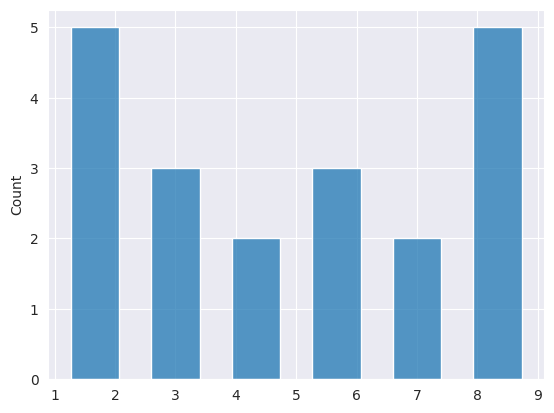

In [165]:
df = pd.DataFrame(np.random.randint(1, 10, 20).reshape(-1, 4), columns = list('abcd'))
result = df.values.ravel()
print(f"Result: {result}")

# Visualization
sns.histplot(result, shrink=0.6);

---
- [numpy.ndarray.ravel()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html#numpy.ndarray.ravel) - return a flattened array.
---

### 75. How to split a text column into two separate columns?

Difficulty Level: L2

Split the string column in df to form a dataframe with 3 columns as shown.

In [166]:
df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])

df_out = df.row.str.split(',|    ', expand=True)

new_header = df_out.iloc[0]
df_out = df_out[1:]
df_out.columns = new_header
df_out

,STD,City,State
1,33,Kolkata,West Bengal
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka
